In [83]:
#import labs for working

import random
from collections import Counter
import json
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
import math

import pandas as pd



In [122]:
#Len of mass
N = 100

In [139]:
def generate_list_of_vlues(count_of_elements: int) -> list[float]:
    "Generate subsequence to list"
    list_of_values: list = [round(random.random(), 3) \
                            for i in range(count_of_elements)]
    return list_of_values

list_of_values = generate_list_of_vlues(N)

In [140]:
def make_collection_of_values(list_of_values: list[float]) -> Counter[float]:
    "Discrete distribution function (frequency polygon)"
    return Counter(list_of_values)

In [141]:
collections_of_values = make_collection_of_values(list_of_values)

In [142]:
def beautiful_print_of_discrate_population(collections_of_values: dict) -> None:
    "Print Discrete distribution function (frequency polygon)"
    print('{:<13} {}'.format('Value', 'Count'))
    [print(values, " ", collections_of_values[values]) \
     for values in collections_of_values]

beautiful_print_of_discrate_population(collections_of_values)

Value         Count
0.988   1
0.243   2
0.969   1
0.627   1
0.0   1
0.179   1
0.944   1
0.81   1
0.102   1
0.535   1
0.726   1
0.208   1
0.006   1
0.555   1
0.679   1
0.948   1
0.079   1
0.981   1
0.788   2
0.414   1
0.787   1
0.181   1
0.406   1
0.996   1
0.319   1
0.69   1
0.012   1
0.232   1
0.837   1
0.857   1
0.282   1
0.804   1
0.169   2
0.246   2
0.611   1
0.393   1
0.256   1
0.41   1
0.099   1
0.515   1
0.354   1
0.401   1
0.712   1
0.385   1
0.08   1
0.756   1
0.94   1
0.723   1
0.612   1
0.995   1
0.303   1
0.572   1
0.523   1
0.543   1
0.131   1
0.671   1
0.178   1
0.057   1
0.97   1
0.668   1
0.236   1
0.729   1
0.159   1
0.501   1
0.16   1
0.7   1
0.02   1
0.008   1
0.479   1
0.808   1
0.309   1
0.536   1
0.809   1
0.865   1
0.819   1
0.342   1
0.747   1
0.505   1
0.007   1
0.056   1
0.009   1
0.692   1
0.272   1
0.728   1
0.626   1
0.086   1
0.9   1
0.323   1
0.171   1
0.189   1
0.019   1
0.903   1
0.647   1
0.297   1
0.699   1
0.25   1


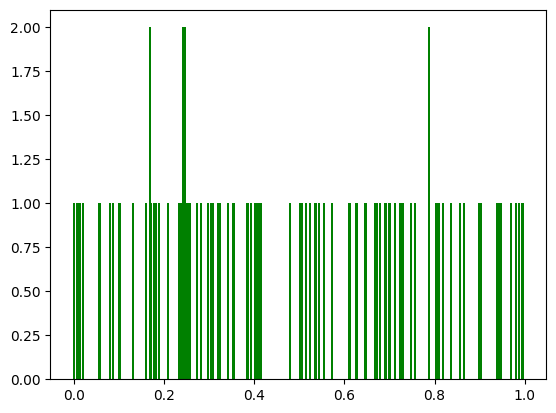

In [143]:
def plotting_discrate_population(collections_of_values: dict) -> None:
    'Visualisation of population'

    plt.bar(list(collections_of_values.keys()), \
            list(collections_of_values.values()), width=0.005, color='g')
    plt.show()

plotting_discrate_population(dict(collections_of_values))

In [145]:
def create_p_i(N: int, collections_of_values: dict):
    values_of_n_i = list(collections_of_values.values())
    P_i = [i / N for i in values_of_n_i]
    return P_i

P_i = create_p_i(N, collections_of_values)
P_i_sum = sum(P_i)
print (P_i_sum)
P_i




1.0000000000000007


[0.01,
 0.02,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.02,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.02,
 0.02,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

In [146]:
def create_n_i_hatch(P_i: dict, N: int):
    n_i_hatch = [x * N for x in P_i]
    return n_i_hatch

n_i_hatch = create_n_i_hatch(P_i, N) 
n_i_hatch

[1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [147]:
def n_i_minus_n_i_hatch(collections_of_values: dict, n_i_hatch: list):
    values_of_n_i = list(collections_of_values.values())
    munes = [x - y for x, y in zip(values_of_n_i, n_i_hatch)]
    return munes

minus = n_i_minus_n_i_hatch(collections_of_values, n_i_hatch)
minus


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [148]:
def sqrt_minus(minus: list):
    sqrt_minus = [i * i for i in minus]
    return sqrt_minus

sqrt_ = sqrt_minus(minus)
sqrt_

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [149]:
def sqrt_div_n_i_hatch(sqrt_: list, n_i_hatch: list):
    result = [x / y for x, y in zip(sqrt_, n_i_hatch)]
    return result

result = sqrt_div_n_i_hatch(sqrt_, n_i_hatch)
result

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [150]:
sum_of_result = sum(result)
sum_of_result

0.0

In [151]:
data = {
        'n_i'             : pd.Series(collections_of_values.values()),
        'value'           : pd.Series(collections_of_values.keys()),
        'P_i'             : pd.Series(P_i),
        'n_i_hatch'       : pd.Series(n_i_hatch),
        'n_i - n_i_hatch' : pd.Series(minus),
        'sqrt'            : pd.Series(sqrt_),
        'sqrt/n_i_hatch'  : pd.Series(result),
        'X^2_obs'         : pd.Series(sum_of_result)
        }
df = pd.DataFrame(data)
df

,n_i,value,P_i,n_i_hatch,n_i - n_i_hatch,sqrt,sqrt/n_i_hatch,X^2_obs
0,1,0.988,0.01,1.0,0.0,0.0,0.0,0.0
1,2,0.243,0.02,2.0,0.0,0.0,0.0,NaN
2,1,0.969,0.01,1.0,0.0,0.0,0.0,NaN
3,1,0.627,0.01,1.0,0.0,0.0,0.0,NaN
4,1,0.000,0.01,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
91,1,0.903,0.01,1.0,0.0,0.0,0.0,NaN
92,1,0.647,0.01,1.0,0.0,0.0,0.0,NaN
93,1,0.297,0.01,1.0,0.0,0.0,0.0,NaN
94,1,0.699,0.01,1.0,0.0,0.0,0.0,NaN


In [152]:
# def calculated_interval_of_population(collections_of_values: dict, N: int) -> float:
#     'Calculate step and count of intervals in population'
#     x_max = max(collections_of_values.keys())
#     x_min = min(collections_of_values.keys())

#     print(x_min, x_max)

#     k = (math.log10(N) * 3.322) + 1
#     print (round(k))

#     if k > 15:
#         k = 15
#     elif k < 5:
#         k = 5

#     h = (x_max - x_min)/k  

#     return round(k)

# interval = calculated_interval_of_population(collections_of_values, N)

In [153]:
# def make_intervals_population(list_of_values: list, interval: int):
#     'counting values in an interval'
#     s = pd.Series(list_of_values)
#     # s = s.groupby(pd.cut(s, bins = interval), observed= True)\
#     #           .apply(lambda x: x.to_list())
#     s = pd.cut(s, bins=interval, right=False).value_counts()
#     print(s)
#     print(type(s))
    

In [154]:
# make_intervals_population(list_of_values, int(interval))